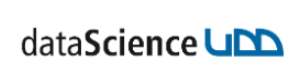

# Tarea n°1: Deep Learning

Profesor: Takeshi Eduardo Asahi Kodama

Alumno: Alejandro Andrés Méndez Miranda

En esta tarea se responderá en conjunto las preguntas 1,2 y 3.

# Pregunta 1

Cargar los datos del set (conjunto) seleccionado. Se sugiere usar pandas (usualmente los datos vienen en archivos csv)


* a. Hacer una breve descripción de estos datos (estadísticas, histogramas, etc.). Se puede utilizar el mismo pandas para este fin.
* b. Separar los datos en conjunto de entrenamiento y conjunto de pruebas (80%, 20%).
* c. Describir estos 2 conjuntos de datos. Idear alguna forma de verificar que los datos están balanceados en términos estadísticos (las 2 poblaciones tienen características estadísticas similares)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

import warnings
warnings.filterwarnings('ignore')

# -------------------------------------------- a -----------------------------------------

Para este trabajo se utilizará el dataset **Classifying wine varieties** obtenidos de kaggle en el siguiente link: [dataset](https://www.kaggle.com/brynja/wineuci). En este trabajo se busca predecir el tipo de vino según distintas características.

In [19]:
header = ['class','alcohol','malicAcid','ash','ashalcalinity'
          ,'magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols'
          ,'proanthocyanins','colorIntensity','hue','od280_od315'
          ,'proline']
                
data = pd.read_csv("C:/Users/alejo/Documents/udd/Wine.csv", header = None, names = header)
data

,class,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


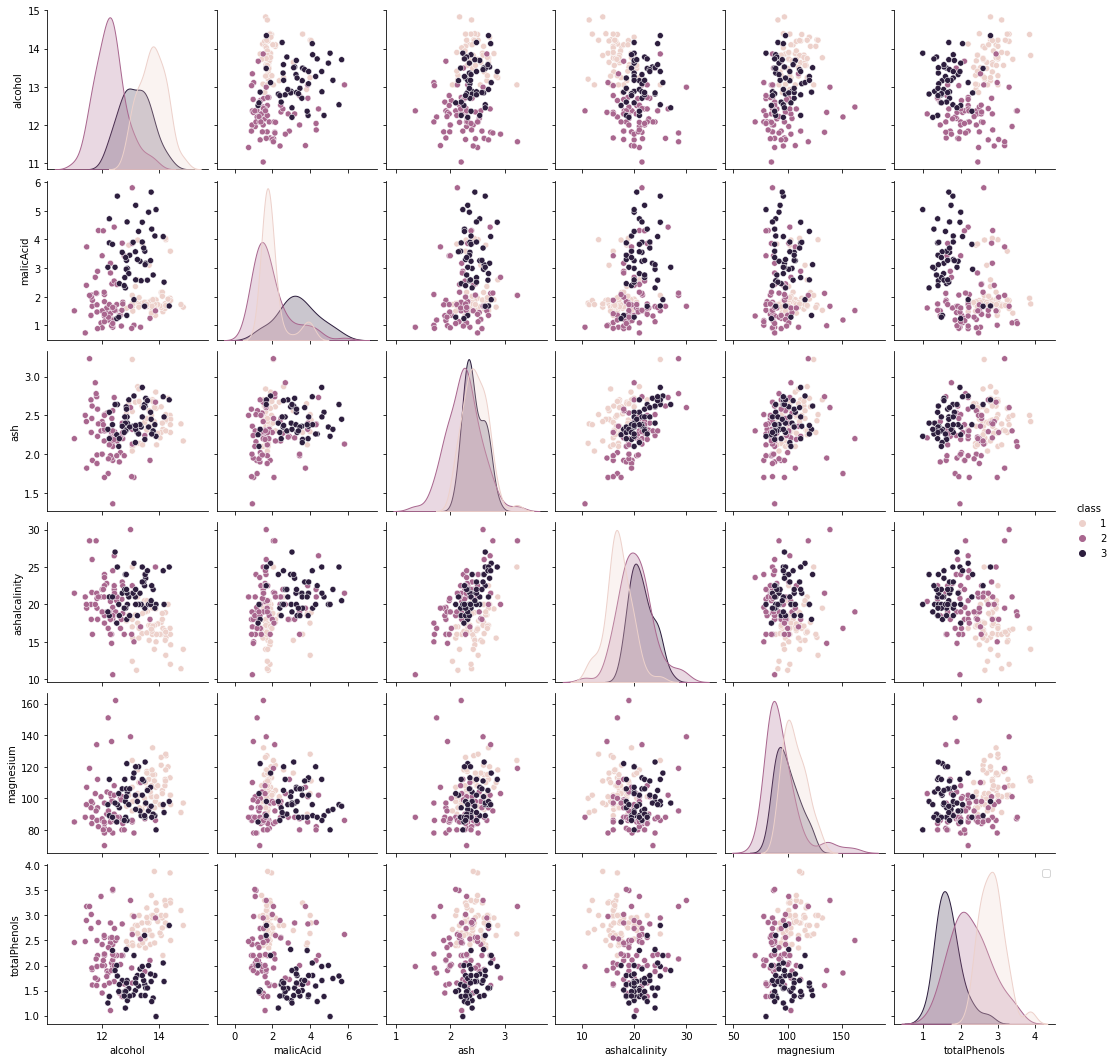

In [20]:
sns.pairplot(data.iloc[:, :7], hue = "class")
plt.legend()
plt.show()

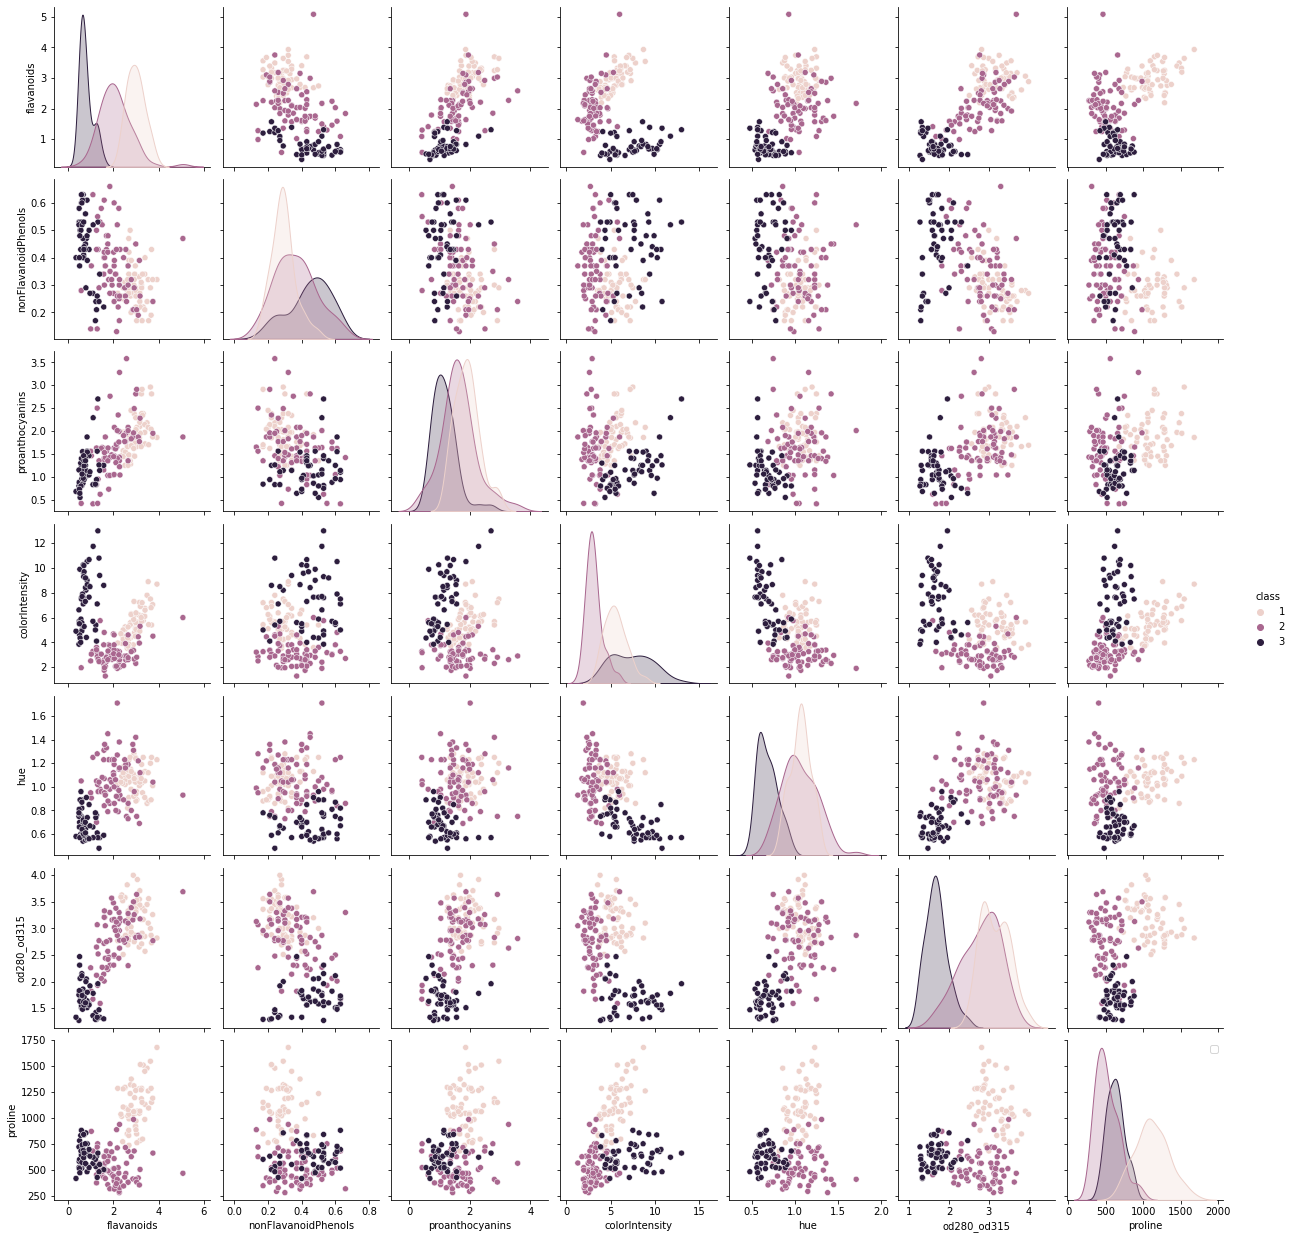

In [21]:
sns.pairplot(data.iloc[:, [0,7,8,9,10,11,12,13]], hue = "class")
plt.legend()
plt.show()

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malicAcid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
ashalcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
totalPhenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonFlavanoidPhenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Aunque no se graficaron todos los pairplot (por un tema estético) se logra apreciar una separabilidad en los datos, mostados en los distintos scatterplot. Además la distribución de los datos para la distintas categorías varía (no son iguales) y la mayoría pareciera ser unimodal y con distribuciones muy parecidas a la normal.

# -------------------------------------------- b -----------------------------------------

In [23]:
#Separación de los datos, 80% para entrenamiento y 20% para testeo

from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:]
y = data.iloc[:,0] -1

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8,random_state=3, stratify = y)

# -------------------------------------------- c -----------------------------------------

Para esta pregunta se utilizará la librería SDV para generar data sintétita. Dentro de esta librería se encuentran herramientas para evaluar la similitud de los dataset. La función utilizada ([link](https://sdv.dev/SDV/user_guides/evaluation/evaluation_framework.html)) según informan:

*The evaluate function applies a collection of pre-configured metric functions and returns the average of the scores that the data obtained on each one of them. In most scenarios this can be enough to get an idea about the similarity of the two tables, but you might want to explore the metrics in more detail.*

Si se agrega el parámetro aggregate = False nos muestra los distintos valores no promediados. Estos valores entre más cercanos a 1 son más similares son los dataset.

Para nuestros datos en general son valores altos de similitud llegando a un promedio de 0.6317, pero notando que solo dos test entregaron valores fuera de lo común, siendo todos los otros sobre 0.87.

In [24]:
from sdv.evaluation import evaluate

data_train = X_train.copy()
data_train["csMPa"] = y_train.copy()

data_test = X_test.copy()
data_test["csMPa"] = y_test.copy()
evaluate(data_train, data_test)

0.6344316899681153

In [25]:
print(evaluate(data_train, data_test, aggregate=False))

                    metric                                     name  \
1        LogisticDetection             LogisticRegression Detection   
2             SVCDetection                            SVC Detection   
11         GMLogLikelihood           GaussianMixture Log Likelihood   
13                  KSTest  Inverted Kolmogorov-Smirnov D statistic   
14          KSTestExtended  Inverted Kolmogorov-Smirnov D statistic   
27  ContinuousKLDivergence   Continuous Kullback–Leibler Divergence   

      raw_score  normalized_score  min_value  max_value      goal  
1      0.988180          0.988180        0.0        1.0  MAXIMIZE  
2      0.950355          0.950355        0.0        1.0  MAXIMIZE  
11 -1452.381517          0.000000       -inf        inf  MAXIMIZE  
13     0.871395          0.871395        0.0        1.0  MAXIMIZE  
14     0.871395          0.871395        0.0        1.0  MAXIMIZE  
27     0.184589          0.184589        0.0        1.0  MAXIMIZE  


# Pregunta 2

Entrenar un sistema de regresión logística. Se sugiere utilizar LogisticRegression de scikit learn.

* a. Probar diferentes combinaciones de solvers, cantidad de iteraciones
* b. Mostrar los diferentes resultados al cambiar esta parametrización
* c. Comentar los resultados al comparar las diferentes soluciones

# -------------------------------------------- a-b -----------------------------------------

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
class Modelo:
    def __init__(self, model, **params):

        self.model = model(**params)
        self.accuracy_res = 0
        self.prs_res = 0
        
    def fit(self, X_train, X_test, y_train, y_test):
        self.model.fit(X_train, y_train)
        self.y_pred = self.predict(X_test)
        self.accuracy_res = self.accuracy(y_test, self.y_pred)
        self.prs_res = self.prs(y_test, self.y_pred)
        
    def predict(self, X_test):
        resultados = self.model.predict(X_test)
        self.y_pred = resultados
        return resultados
    
    def accuracy(self, y_test, y_pred):
        metrica_acc = accuracy_score(y_test, y_pred)
        metrica_acc = np.round(np.array(metrica_acc),3)
        return metrica_acc
        
    
    def prs(self, y_test, y_pred):
        metrica_prs = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
        metrica_prs = np.round(np.array(metrica_prs[0:3]),3)
        return np.array(metrica_prs)
        
        


In [27]:
accuracy_list = []
model_list = []
iteration_list = []
for solver in ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]:
    for it in [1,10,50,60,100, 200]:
        reg1 = Modelo(LogisticRegression, solver = solver, max_iter = it)
        reg1.fit(X_train, X_test, y_train, y_test)
        print("###############################################")
        print(f"Modelo con Solver: {solver}, Iteraciones: {it}")
        print("###############################################")
        print(f"Accuracy : {reg1.accuracy_res}")
        print(f"Precision : {reg1.prs_res[0]}")
        print(f"Recall : {reg1.prs_res[1]}")
        print(f"Fscore : {reg1.prs_res[2]} ")
        accuracy_list.append(reg1.accuracy_res)
        model_list.append(solver)
        iteration_list.append(it)


###############################################
Modelo con Solver: newton-cg, Iteraciones: 1
###############################################
Accuracy : 0.333
Precision : 0.111
Recall : 0.333
Fscore : 0.167 
###############################################
Modelo con Solver: newton-cg, Iteraciones: 10
###############################################
Accuracy : 0.889
Precision : 0.914
Recall : 0.889
Fscore : 0.89 
###############################################
Modelo con Solver: newton-cg, Iteraciones: 50
###############################################
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
Fscore : 1.0 
###############################################
Modelo con Solver: newton-cg, Iteraciones: 60
###############################################
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
Fscore : 1.0 
###############################################
Modelo con Solver: newton-cg, Iteraciones: 100
###############################################
Accuracy : 1.0
Precision : 1.0
Recall : 1.0

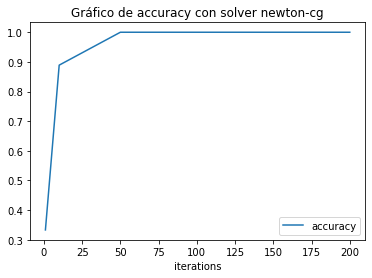

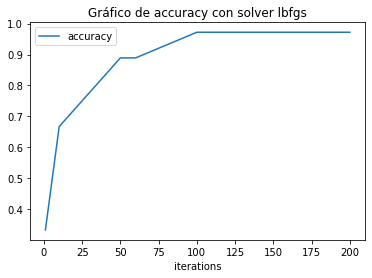

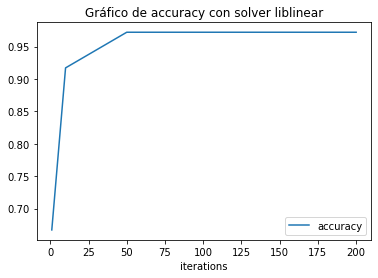

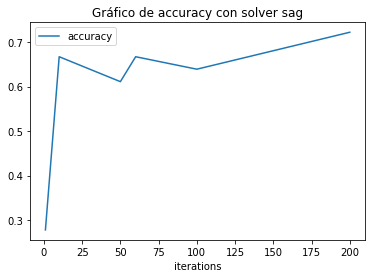

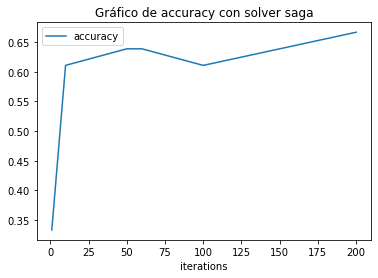

In [28]:
df_results = pd.DataFrame({"accuracy": accuracy_list, "solver":model_list, "iterations":iteration_list})
for i in ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]:
    df_results[df_results.solver == i].loc[:,['accuracy', 'iterations']].plot(x = "iterations", y = "accuracy", title = f'Gráfico de accuracy con solver {i}')
    plt.show()

# -------------------------------------------- c -----------------------------------------

Para los distintos solver utilizados se obtuvieron distintos resultados. Tanto newton-cg, lbfgsy  liblinear obtuvieron buenos resultados, llegando a valores de accuracy de 1, 0.972 y 0.972 respectivamente evaluados en los datos de testeo. Los otros solver no obtuvieron tan buenos resultados, llegando a valores menores. Además, como es esperable, a mayor cantidad de iteraciones mejores resultados, aun así, no todos los solver tuvieron los mismos resultados con el paso de las iteraciones, el comportamiento se puede apreciar en los distintos gráficos, donde el que convergió más rápido fue newton-cg.

# Pregunta 3

Entrenar un sistema de Red Neuronal Densa Superficial (p.ej., 1 capa oculta) para el predictor

* a. Probar el sistema con diferentes configuraciones de capas y cantidad de neuronas
* b. Cambiar la función a minimizar (función objetivo – losses)
* c. Comentar los resultados al comparar las diferentes soluciones

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# -------------------------------------------- a -----------------------------------------

Para las distintas configuraciones se probó:

* Número de neuronas
* Distintas funciones de activación
* BatchNormalization al inicio

In [30]:
class nn_model:
    
    def __init__(self, input_shape, neurons = 256, batchnorm = True, activation = 'relu'):
        inputs = keras.Input(shape = input_shape)
        if batchnorm:
            x = layers.BatchNormalization()(inputs)
        else:
            x = inputs
        x = layers.Dense(256, activation = 'relu')(x)
        outputs = layers.Dense(3, activation = 'softmax')(x)
        self.model = keras.Model(inputs = inputs, outputs = outputs, name = 'model')
        
    def compile_(self, loss, optimizer, metrics):
        self.model.compile(loss =loss, optimizer =optimizer, metrics =metrics)
    
    def fit(self, X_train, X_test, y_train, y_test, batch_size, epochs):
        self.history = self.model.fit(X_train, y_train, batch_size, epochs,
                      validation_data = (X_test, y_test), verbose=0)
        y_pred = self.predict(X_test)        
        self.metrics_acc, self.metrics_prs = self.evaluate(y_pred, y_test)
        
    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        y_pred = np.argmax(y_pred, -1)
        return y_pred
    
    def evaluate(self, y_pred, y_test):

        metrica_acc = accuracy_score(y_test, y_pred)
        metrica_acc = np.round(np.array(metrica_acc),3)
        metrica_prs = precision_recall_fscore_support(y_test, y_pred, average = 'weighted')
        metrica_prs = np.round(np.array(metrica_prs[2]),3)
        return metrica_acc, metrica_prs 
    
    def plot_results(self, type_plt = 'loss'):
        if type_plt == 'loss':
            data = pd.DataFrame(self.history.history)
            data.loc[:,['loss', 'val_loss']].plot(title = 'Gráfico de pérdida')
            plt.ylabel("Loss")
            plt.xlabel("Epochs")
            plt.legend(['Training Loss', 'Validation Loss'])
        elif type_plt == 'acc':
            data = pd.DataFrame(self.history.history)
            data.loc[:,['accuracy', 'val_accuracy']].plot(title = 'Gráfico de accuracy')
            plt.ylabel("Accuracy")
            plt.xlabel("Epochs")
            plt.legend(['Training Accuracy', 'Validation Accuracy'])
            
        

###############################################
Modelo con n° Neuronas: 10
Modelo Accuracy: 0.944
Modelo F1: 0.944
###############################################


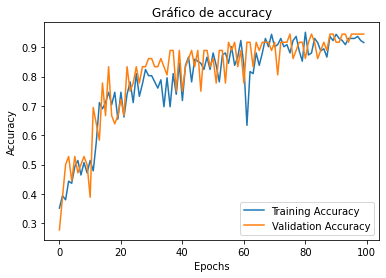

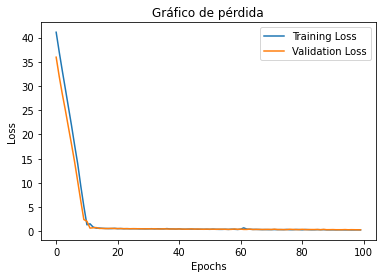

###############################################
Modelo con n° Neuronas: 100
Modelo Accuracy: 0.917
Modelo F1: 0.915
###############################################


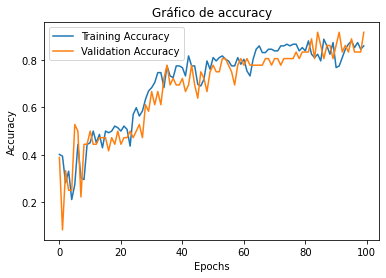

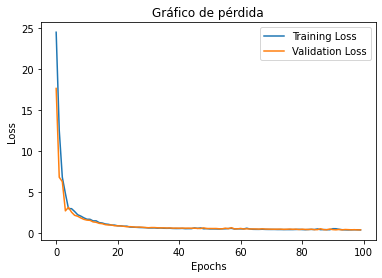

###############################################
Modelo con n° Neuronas: 1000
Modelo Accuracy: 0.806
Modelo F1: 0.803
###############################################


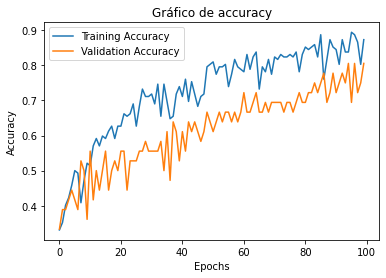

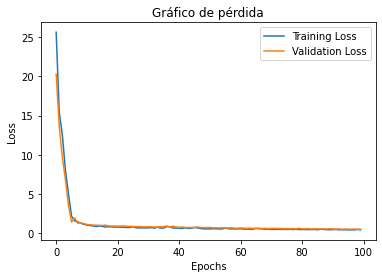

In [31]:
#Prueba con distinta cantidad de neuronas

for neur in [10,100,1000]:
    mymodel = nn_model([X_train.shape[1]], neur, False )
    mymodel.compile_('sparse_categorical_crossentropy', 
                       
                tf.keras.optimizers.Adam(learning_rate=0.0001),
                      
                metrics=['accuracy'])
    mymodel.fit(X_train, X_test, y_train, y_test, 20, 100)
    print("###############################################")
    print(f"Modelo con n° Neuronas: {neur}")
    print(f"Modelo Accuracy: {mymodel.metrics_acc}")
    print(f"Modelo F1: {mymodel.metrics_prs}")
    print("###############################################")
    mymodel.plot_results('acc')
    mymodel.plot_results('loss')
    plt.show()

###############################################
Modelo con Funcion de Activación: tanh
Modelo Accuracy: 0.833
Modelo F1: 0.835
###############################################


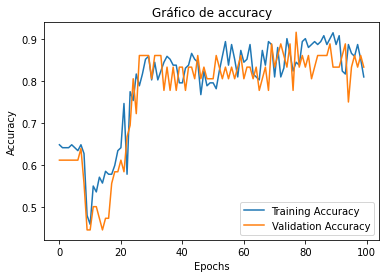

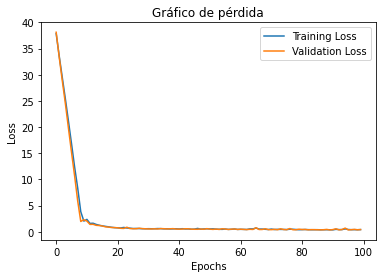

###############################################
Modelo con Funcion de Activación: relu
Modelo Accuracy: 0.833
Modelo F1: 0.835
###############################################


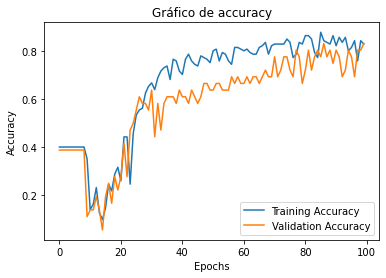

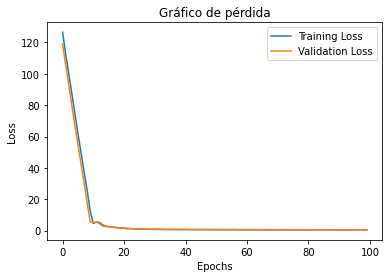

###############################################
Modelo con Funcion de Activación: sigmoid
Modelo Accuracy: 0.889
Modelo F1: 0.89
###############################################


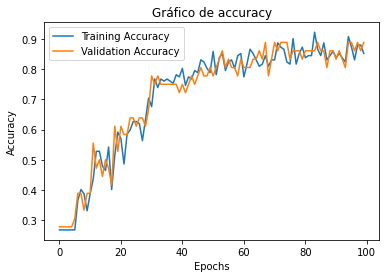

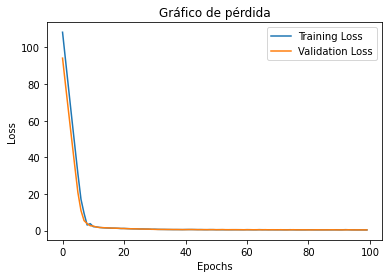

In [32]:
# Pruebas con distintas funciones de activación 

for activ in ['tanh', 'relu', 'sigmoid']:
    mymodel = nn_model([X_train.shape[1]],100, False, activ)
    mymodel.compile_('sparse_categorical_crossentropy', 
                       
                tf.keras.optimizers.Adam(learning_rate=0.0001),
                      
                metrics=['accuracy'])
    mymodel.fit(X_train, X_test, y_train, y_test, 20, 100)
    print("###############################################")
    print(f"Modelo con Funcion de Activación: {activ}")
    print(f"Modelo Accuracy: {mymodel.metrics_acc}")
    print(f"Modelo F1: {mymodel.metrics_prs}")
    print("###############################################")
    mymodel.plot_results('acc')
    mymodel.plot_results('loss')
    plt.show()

###############################################
Modelo con Batch Normalization: False
Modelo Accuracy: 0.861
Modelo F1: 0.864
###############################################


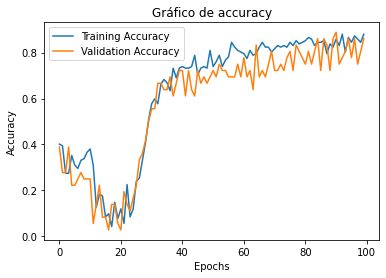

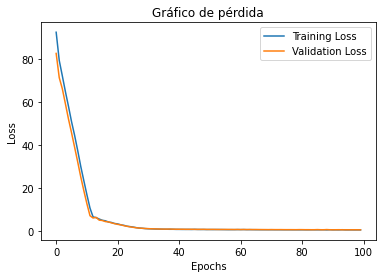

###############################################
Modelo con Batch Normalization: True
Modelo Accuracy: 1.0
Modelo F1: 1.0
###############################################


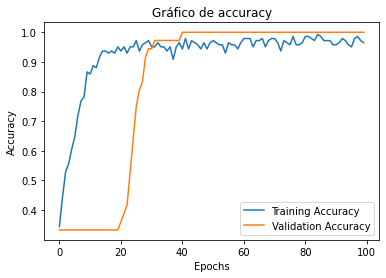

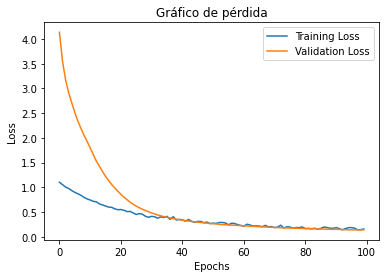

In [33]:
# Pruebas con o sin utilización de Batch Normalization

for batch_norm in [False, True]:
    mymodel = nn_model([X_train.shape[1]],100, batch_norm)
    mymodel.compile_('sparse_categorical_crossentropy', 
                       
                tf.keras.optimizers.Adam(learning_rate=0.0001),
                      
                metrics=['accuracy'])
    mymodel.fit(X_train, X_test, y_train, y_test, 20, 100)
    print("###############################################")
    print(f"Modelo con Batch Normalization: {batch_norm}")
    print(f"Modelo Accuracy: {mymodel.metrics_acc}")
    print(f"Modelo F1: {mymodel.metrics_prs}")
    print("###############################################")
    mymodel.plot_results('acc')
    mymodel.plot_results('loss')
    plt.show()

# -------------------------------------------- b -----------------------------------------

Se probaron dos funciones de pérdida:

* Sparce categorical crossentropy
*  Kullback leibler divergence

######################################################################
Modelo con Función de Pérdida: sparse_categorical_crossentropy
Modelo Accuracy: 1.0
Modelo F1: 1.0
######################################################################


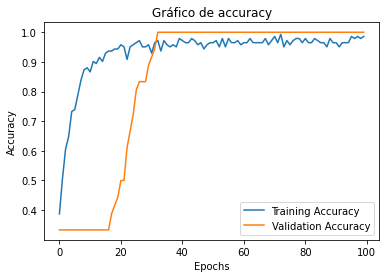

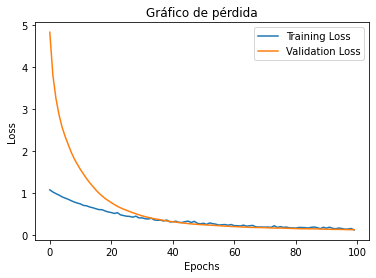

######################################################################
Modelo con Función de Pérdida: kullback_leibler_divergence
Modelo Accuracy: 0.333
Modelo F1: 0.295
######################################################################


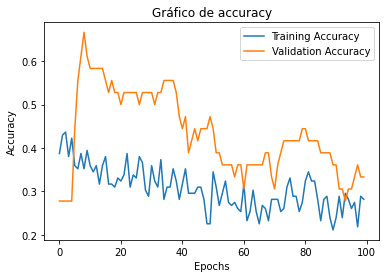

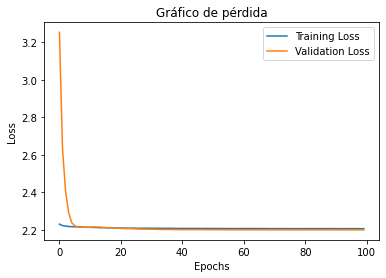

In [34]:
#Pruebas con distintas funciones de pérdida

for func_perd in ['sparse_categorical_crossentropy', 'kullback_leibler_divergence' ]:
    mymodel = nn_model([X_train.shape[1]],100, True)
    mymodel.compile_(func_perd,      
                tf.keras.optimizers.Adam(learning_rate=0.0001),                   
                metrics=['accuracy'])
    
    mymodel.fit(X_train, X_test, y_train, y_test, 20, 100)
    print("######################################################################")
    print(f"Modelo con Función de Pérdida: {func_perd}")
    print(f"Modelo Accuracy: {mymodel.metrics_acc}")
    print(f"Modelo F1: {mymodel.metrics_prs}")
    print("######################################################################")
    mymodel.plot_results('acc')
    mymodel.plot_results('loss')
    plt.show()

# -------------------------------------------- c -----------------------------------------

Al analizar la cantidad de neuronas nos damos cuenta que no siempre aumentar el número de neuronas es mejor. Al utilizar 1000 neuronas se obtienen peores resultados que utilizando 10 o 100. Mientras que usualmente las curvas de accuracy para los set de entrenamiento y validación se cruzaban al utilizar 10 o 100 neuronas, al utilizar 1000 neuronas, en las últimas épocas, el gráfico de accuracy para los datos de validación queda por debajo que el de entrenamiento.

Al analizar las distintas configuraciones, la función relu fue la que dio mejores resultados por sobre la función sigmoide y tanh al obtener mejores métricas de accuracy para el set de validación. 

Al analizar el utilizar BatchNormalization se obtienen mejores resultados usando este tipo de normalización de los datos. Se llega a mayores métricas en menos cantidad de epocas utilizando BatchNormalization.

Finalmente la correcta selección de función de pérdida muestra ser muy importante. Sparce categorical crossentropy mostró una tendencia al aumento en la métrica accuracy, mientras que la función Kullback leibler divergence no, teniendo un comportamiento errático.